# Data Science Methodology for Breast Cancer Diagnosis (DSM-BCD)

**Problema.** Colombia presenta limitaciones con respecto al acceso de la detección y el diagnóstico temprano del cáncer, provocado en la mayoría de los casos por factores como el estrato socio-económico, la cobertura del seguro de salud, el origen y la accesibilidad. En promedio, el tiempo de espera de un paciente es de 90 días desde la aparición de los síntomas hasta el diagnóstico de dicho cáncer. La primera acción para reducir la tasa de mortalidad por cáncer de mama debe estar enfocada en la agilidad del diagnóstico y el acceso oportuno a la atención.  Así, el objetivo de esta investigación es aplicar las etapas de la metodología KDD\footnote{Knowledge Discovery in Databases} al conjunto de datos de morbilidad por cáncer entre los años 2019 y 2020 en el municipio de Pereira-Risaralda. Esto con la finalidad de pronosticar y caracterizar el tipo de población mas susceptible de padecer esta enfermedad según su edad, genero, zona y régimen de salud.

**Conjunto de datos.** Un total de 817 muestras de tumores de mama se perfilaron con cinco plataformas diferentes como se ha descrito previamente (Cancer Genome Atlas Research Network, 2014) y también se perfilaron 633 casos mediante matriz de proteínas en fase inversa (RPPA)


# Análisis exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import numpy as np

### CRUDAS

In [2]:
import seaborn as sns
import pandas as pd

with open('brca_tcga_pub2015_clinical_data.csv') as f:
    breast_cancer=pd.read_csv(f, delimiter="\t")

PATH_CRUDAS = 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_CRUDAS\\'

breast_cancer.rename(
columns={
'Did patient start adjuvant postoperative radiotherapy?':'Did patient start adjuvant postoperative radiotherapy',
}, inplace=True)


In [3]:
a=0
for i in breast_cancer.columns:
    if breast_cancer[i].dtypes == 'float64' or breast_cancer[i].dtypes == 'int64':
        a= a +1
        #fig, ax = plt.subplots(figsize=(4, 5))
        #numerical=sns.histplot(breast_cancer[i],kde = False, color='orange', edgecolor='red',ax=ax)
        numerical=sns.histplot(breast_cancer[i],kde = False, color='orange', edgecolor='red')
        numerical.tick_params(axis='x')
        numerical.set(title=i)
        plot_num=numerical.get_figure()
        #plot_num.savefig(PATH_CRUDAS+str(a)+"_"+i+".pdf",bbox_inches = 'tight')
        plot_num.savefig(PATH_CRUDAS+str(a)+".pdf",bbox_inches = 'tight',dpi=600)    
        plt.clf()

    if breast_cancer[i].dtypes == 'object' or breast_cancer[i].dtype== 'bool' : 
        a= a +1
        #fig, ax = plt.subplots(figsize=(4, 5))
        #categorical=sns.countplot(x=breast_cancer[i], order = breast_cancer[i].value_counts().iloc[:10].index,palette="YlOrBr",ax=ax)
        categorical=sns.countplot(x=breast_cancer[i], order = breast_cancer[i].value_counts().iloc[:3].index,palette="YlOrBr")
        categorical.tick_params(axis='x',rotation=75)

        categorical.set(title=i)
        plot_cat = categorical.get_figure()
        #plot_cat.savefig(PATH_CRUDAS+str(a)+"_"+i+".pdf",bbox_inches = 'tight')    
        plot_cat.savefig(PATH_CRUDAS+str(a)+".pdf",dpi=600)    
        plt.clf()


<Figure size 432x288 with 0 Axes>

## DESCRIPTIVAS

In [ ]:
with open('Breast_Clean_Data.csv') as f:
    breast_clean=pd.read_csv(f, delimiter=',')

PATH_DESCRIPTIVAS = 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_DESCRIPTIVAS\\'

In [ ]:
a=0
for i in breast_clean.columns:
    if breast_clean[i].dtypes == 'float64' or breast_clean[i].dtypes == 'int64':
        a= a +1
        numerical=sns.histplot(breast_clean[i],kde = True,color='purple')
        numerical.tick_params(axis='x', rotation=75)
        numerical.set(title=i)
        plot_num=numerical.get_figure()
        plot_num.savefig(PATH_DESCRIPTIVAS+str(a)+"_"+i+".pdf",bbox_inches = 'tight')
        plt.clf()

    if breast_clean[i].dtypes == 'object' or breast_clean[i].dtype== 'bool' : 
        a= a +1
        categorical=sns.countplot(x=breast_clean[i], order = breast_clean[i].value_counts().iloc[:10].index,palette="flare")
        categorical.tick_params(axis='x', rotation=75)
        categorical.set(title=i)
        plot_cat = categorical.get_figure()
        plot_cat.savefig(PATH_DESCRIPTIVAS+str(a)+"_"+i+".pdf",bbox_inches = 'tight')    
        plt.clf()

### Graficar datos perdidos

In [ ]:
import missingno as msno 

with open('brca_tcga_pub2015_clinical_data.csv') as f:
    breast_cancer=pd.read_csv(f, delimiter="\t")

PATH_PERDIDOS= 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_PERDIDAS\\'

numericas = breast_cancer.select_dtypes(exclude=['object','bool'])
categoricas = breast_cancer.select_dtypes(exclude=['float64','int64'])

missing = 'missing'
name_num= 'numericas' 
name_categoricas= 'categoricas'

### Variables Multiples Datos Crudos

In [ ]:
# Heat Map
fig, ax = plt.subplots(figsize=(15,35))
sns.heatmap(data=breast_cancer.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'},ax=ax)
plt.savefig(PATH_PERDIDOS+missing+"_heatmap"+".pdf",bbox_inches = 'tight')

# Displot
plt.figure(figsize=(15,35))
sns.displot(data=breast_cancer.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",height=20, aspect=11.7/20)
plt.savefig(PATH_PERDIDOS+missing+"_displot"+".pdf",bbox_inches = 'tight')

# Matrix
fig = msno.matrix(breast_cancer)
fig_copy = fig.get_figure()
fig_copy.savefig(PATH_PERDIDOS+missing+"_matrix"+".pdf",bbox_inches = 'tight')

#### Variables multiples de data limpia

In [77]:
import missingno as msno 
with open('Breast_Clean_Data.csv') as f:
    breast_clean=pd.read_csv(f, delimiter=',')

PATH_PERDIDOS= 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_PERDIDAS\\'
impute = 'impute'

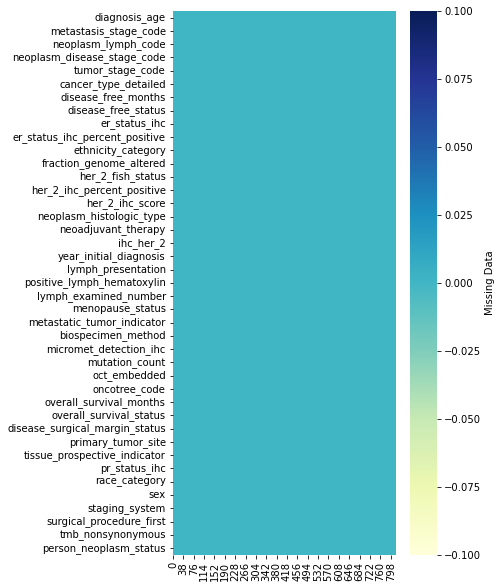

<Figure size 1080x2520 with 0 Axes>

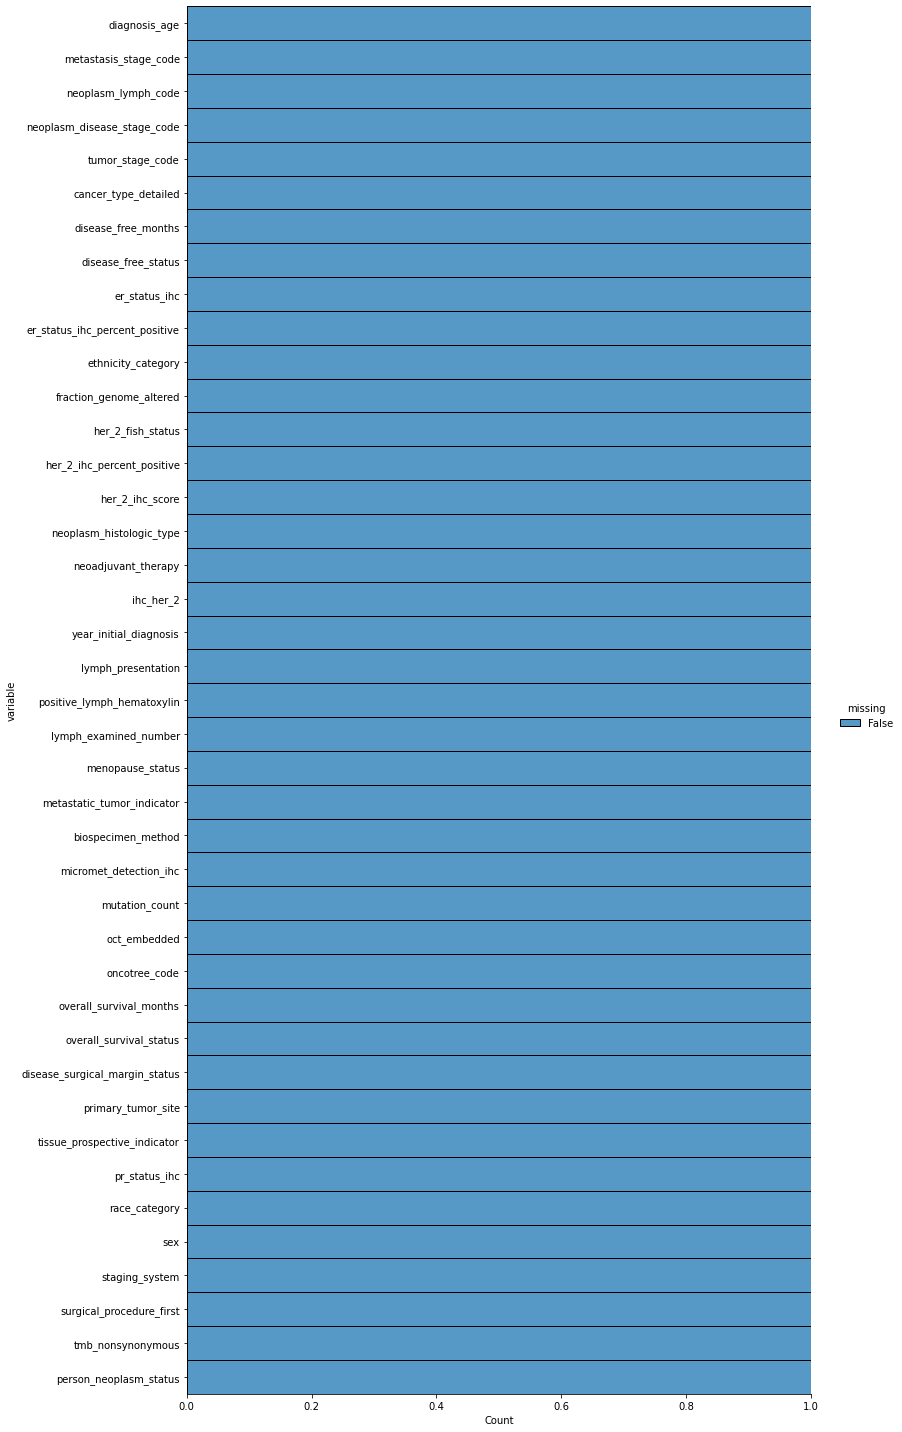

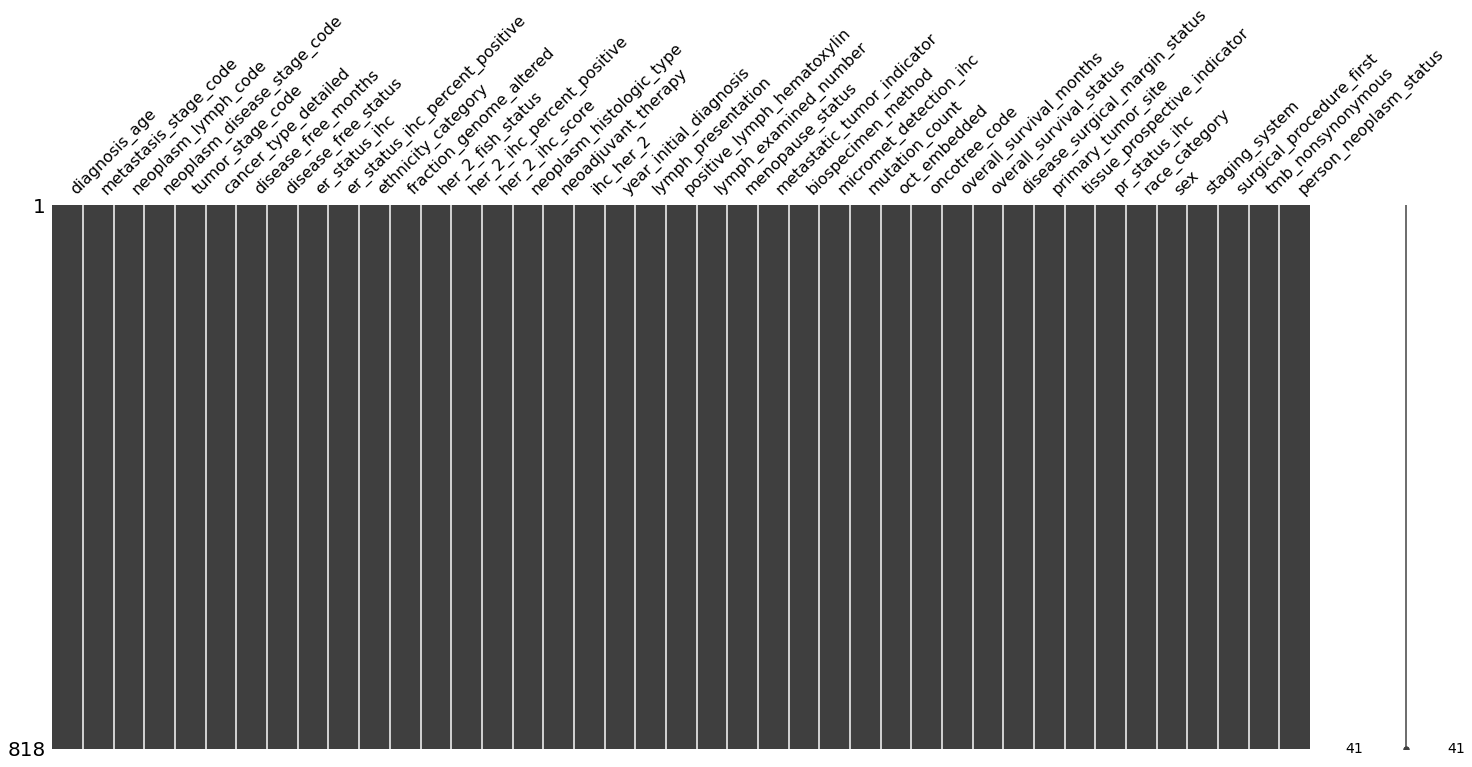

In [78]:
# Heat Map
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(data=breast_clean.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'},ax=ax)
plt.savefig(PATH_PERDIDOS+impute+"_heatmap"+".pdf",bbox_inches = 'tight')

# Displot
plt.figure(figsize=(15,35))
sns.displot(data=breast_clean.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",height=20, aspect=11.7/20)
plt.savefig(PATH_PERDIDOS+impute+"_displot"+".pdf",bbox_inches = 'tight')

# Matrix
fig = msno.matrix(breast_clean)
fig_copy = fig.get_figure()
fig_copy.savefig(PATH_PERDIDOS+impute+"_matrix"+".pdf",bbox_inches = 'tight')


#### Variables Numericas

In [ ]:
# Heat Map
plt.figure(figsize=(10,6))
sns.heatmap(data=numericas.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig(PATH_PERDIDOS+name_num+"_heatmap"+".pdf",bbox_inches = 'tight')

# Displot
plt.figure(figsize=(20,60))
sns.displot(data=numericas.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",aspect=1.2)
plt.savefig(PATH_PERDIDOS+name_num+"_displot"+".pdf",bbox_inches = 'tight')

# Matrix
fig = msno.matrix(numericas)
fig_copy = fig.get_figure()
fig_copy.savefig(PATH_PERDIDOS+name_num+"_matrix"+".pdf",bbox_inches = 'tight')

#### Variables Categoricas

In [ ]:
# Heat Map
plt.figure(figsize=(10,6))
sns.heatmap(data=categoricas.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig(PATH_PERDIDOS+name_categoricas+"_heatmap"+".pdf",bbox_inches = 'tight')

# Displot
plt.figure(figsize=(40,60))
sns.displot(data=categoricas.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",height=15, aspect=11.7/15)
plt.savefig(PATH_PERDIDOS+name_categoricas+"_displot"+".pdf",bbox_inches = 'tight')

# Matrix
fig = msno.matrix(categoricas)
fig_copy = fig.get_figure()
fig_copy.savefig(PATH_PERDIDOS+name_categoricas+"_matrix"+".pdf",bbox_inches = 'tight')

### Correlacion

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

with open('Breast_Clean_Data.csv') as f:
    breast_clean=pd.read_csv(f, delimiter=',')

PATH_CORR= 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_CORRELACION\\'

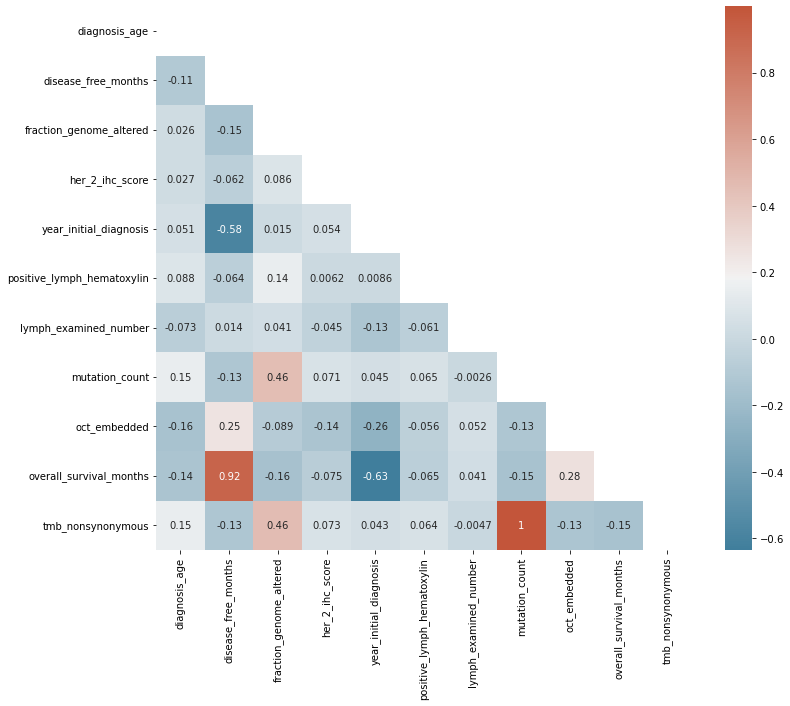

In [76]:
# Correlation between different variables
corr = breast_clean.corr(method = 'spearman')
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig_heat=sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
fig_heat = fig_heat.get_figure()
fig_heat.savefig(PATH_CORR+"correlacion_spearman"+".pdf",bbox_inches = 'tight')

<Figure size 864x720 with 0 Axes>

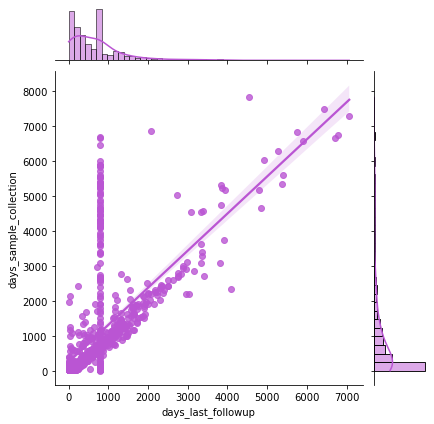

In [73]:
# Plotting a Joint Plot with Regression Context
import seaborn as sns
import matplotlib.pyplot as plt
name='reg'
x='days_last_followup'
y='days_sample_collection'

#sns.pairplot(breast_clean,kind = "reg")

plt.figure(figsize=(12,10))
sns.jointplot(data=breast_clean, x=x, y=y, kind='reg', color='mediumorchid')
plt.savefig(PATH_CORR+name+"_"+x+"_"+y+".pdf",bbox_inches = 'tight')